In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

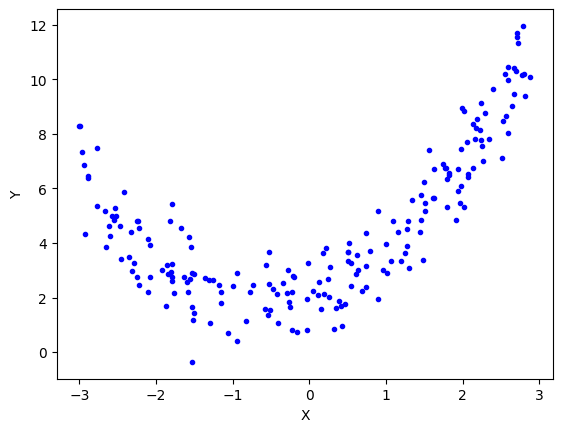

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.18887973311428885


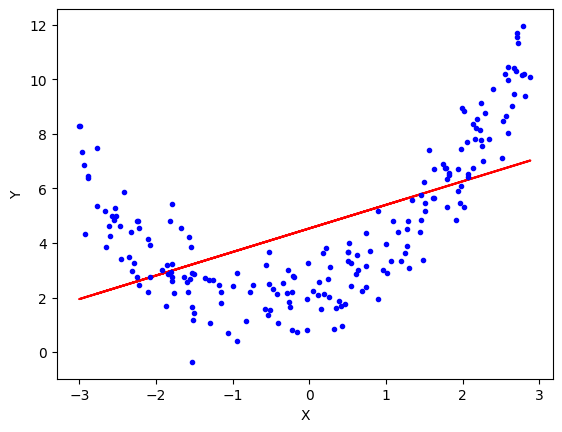

In [ ]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In polynomial regression, the "include_bias" parameter determines whether a constant term (bias) should be added to the polynomial features.

When "include_bias" is set to True, it means that a column of ones will be added to the beginning of the transformed feature matrix. This effectively adds a constant term to the polynomial features, allowing the model to learn a y-intercept, even if the original data doesn't include a constant term.

In simpler terms, including the bias term allows the polynomial regression model to capture the baseline value of the dependent variable when all independent variables are zero. This can be important because in many real-world scenarios, even when the predictors are zero, there might still be some inherent value or starting point for the outcome variable.

So, setting "include_bias" to True helps ensure that our model can learn and account for this baseline value. If set to False, no bias term will be added, and the model will assume that the baseline value is zero, which might not be appropriate for all datasets.

In [ ]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.9028332409667271


X_new = np.linspace(-3, 3, 200).reshape(200, 1): This creates a new set of input data (X_new) ranging from -3 to 3, with 200 evenly spaced points. It's reshaped to be a column vector with 200 rows and 1 column.

X_new_poly = poly.transform(X_new): This transforms the new input data (X_new) using the polynomial features transformation that was applied to the training and testing data earlier. This ensures that the new data is in the same format as the data the model was trained on.

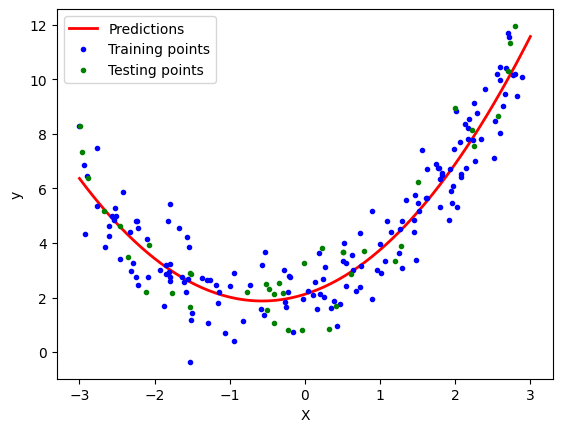

In [ ]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

sales - y
tv - x1  linear
mobile - x2

y = a tv+ b mobile2

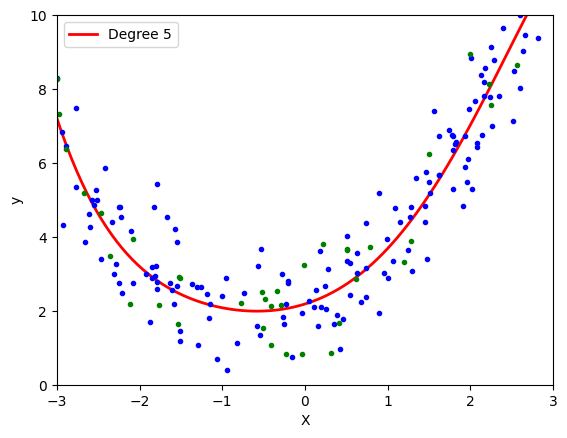

In [ ]:
polynomial_regression(5)
